In [1]:
import keras
import random, os
from keras.layers import Activation, Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Flatten
from keras.models import Model, Sequential
from keras import backend as K
from glob import glob
import numpy as np
import re
from keras.utils.vis_utils import model_to_dot
import random
import matplotlib.pyplot as plt
from scipy.spatial import distance
from IPython.display import Image
import PIL

Using TensorFlow backend.


In [2]:
batch_size = 256
num_classes = 6
epochs = 1000
img_rows, img_cols = 28, 28
label = ["circle", "square", "triangle", "horizontal", "vertical", "diagonal"]

In [3]:
def load_data():
    tr_path = './dataset/trains/'
    te_path = './dataset/tests/'
    va_path = './dataset/vals/'
    
    (tr_sets, tr_labels, _) = get_datasets_labels(tr_path)
    (te_sets, te_labels, test_labels_with_num) = get_datasets_labels(te_path)
    (va_sets, va_labels, _) = get_datasets_labels(va_path)
    
    
    tr_sets = np.array(tr_sets)
    te_sets = np.array(te_sets)
    va_sets = np.array(va_sets)
    tr_labels = np.array(tr_labels)
    te_labels = np.array(te_labels)
    va_labels = np.array(va_labels)
    test_labels_with_num = np.array(test_labels_with_num)
    return tr_sets, tr_labels, te_sets, te_labels, va_sets, va_labels, test_labels_with_num

In [4]:
def get_datasets_labels(path):
	files = os.listdir(path)
	labels = []
	lbs = []
	sets = []
	for file in files:
		pic = PIL.Image.open(path + file)
		lb = file.replace(re.findall("\d+", file)[0], '').replace('.png', '') 
		forlb = file.replace('.png', '') 
		
		labels.append(label.index(lb))
		lbs.append(forlb)
		
		pic = np.array(pic)
		sets.append(pic)
	return sets, labels, lbs

In [5]:
(x_train, y_train, x_test, y_test, x_val, y_val, test_labels_with_num) = load_data()
y_test1 = y_test
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255.
x_test /= 255.
x_val /= 255.

In [97]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
#

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation = 'relu'))

#model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

In [98]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
activation_9 (Activation)    (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
activation_10 (Activation)   (None, 14, 14, 128)       0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 64)          73792     
__________

In [99]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [100]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, validation_data=(x_val, y_val))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

Train on 1800 samples, validate on 1200 samples
Epoch 1/1000
1800/1800 [==============================] - 1s 326us/step - loss: 1.7937 - acc: 0.1672 - val_loss: 1.7933 - val_acc: 0.1667
Epoch 2/1000
1800/1800 [==============================] - 0s 57us/step - loss: 1.7937 - acc: 0.1594 - val_loss: 1.7920 - val_acc: 0.1667
Epoch 3/1000
1800/1800 [==============================] - 0s 54us/step - loss: 1.7923 - acc: 0.1689 - val_loss: 1.7916 - val_acc: 0.1667
Epoch 4/1000
1800/1800 [==============================] - 0s 55us/step - loss: 1.7917 - acc: 0.1772 - val_loss: 1.7914 - val_acc: 0.1667
Epoch 5/1000
1800/1800 [==============================] - 0s 56us/step - loss: 1.7928 - acc: 0.1667 - val_loss: 1.7915 - val_acc: 0.1667
Epoch 6/1000
1800/1800 [==============================] - 0s 55us/step - loss: 1.7912 - acc: 0.1700 - val_loss: 1.7906 - val_acc: 0.1667
Epoch 7/1000
1800/1800 [==============================] - 0s 62us/step - loss: 1.7899 - acc: 0.1717 - val_loss: 1.7901 - val_acc:

1800/1800 [==============================] - 0s 57us/step - loss: 0.4474 - acc: 0.8511 - val_loss: 1.0295 - val_acc: 0.6367
Epoch 61/1000
1800/1800 [==============================] - 0s 55us/step - loss: 0.4136 - acc: 0.8539 - val_loss: 0.3679 - val_acc: 0.8717
Epoch 62/1000
1800/1800 [==============================] - 0s 60us/step - loss: 0.3278 - acc: 0.8833 - val_loss: 0.3617 - val_acc: 0.8717
Epoch 63/1000
1800/1800 [==============================] - 0s 75us/step - loss: 0.2857 - acc: 0.9033 - val_loss: 1.1030 - val_acc: 0.6092
Epoch 64/1000
1800/1800 [==============================] - 0s 64us/step - loss: 0.4830 - acc: 0.8417 - val_loss: 0.4426 - val_acc: 0.8350
Epoch 65/1000
1800/1800 [==============================] - 0s 61us/step - loss: 0.2294 - acc: 0.9217 - val_loss: 0.2889 - val_acc: 0.9042
Epoch 66/1000
1800/1800 [==============================] - 0s 72us/step - loss: 0.2633 - acc: 0.9117 - val_loss: 0.3525 - val_acc: 0.8683
Epoch 67/1000
1800/1800 [=======================

1800/1800 [==============================] - 0s 56us/step - loss: 0.0157 - acc: 0.9961 - val_loss: 0.0944 - val_acc: 0.9683
Epoch 120/1000
1800/1800 [==============================] - 0s 70us/step - loss: 0.0140 - acc: 0.9978 - val_loss: 0.1407 - val_acc: 0.9508
Epoch 121/1000
1800/1800 [==============================] - 0s 93us/step - loss: 0.0775 - acc: 0.9733 - val_loss: 0.1068 - val_acc: 0.9658
Epoch 122/1000
1800/1800 [==============================] - 0s 82us/step - loss: 0.0166 - acc: 0.9967 - val_loss: 0.1051 - val_acc: 0.9658
Epoch 123/1000
1800/1800 [==============================] - 0s 62us/step - loss: 0.0140 - acc: 0.9978 - val_loss: 0.0914 - val_acc: 0.9708
Epoch 124/1000
1800/1800 [==============================] - 0s 57us/step - loss: 0.0121 - acc: 0.9972 - val_loss: 0.0920 - val_acc: 0.9700
Epoch 125/1000
1800/1800 [==============================] - 0s 54us/step - loss: 0.0089 - acc: 0.9989 - val_loss: 0.1060 - val_acc: 0.9667
Epoch 126/1000
1800/1800 [================

1800/1800 [==============================] - 0s 64us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.0949 - val_acc: 0.9750
Epoch 179/1000
1800/1800 [==============================] - 0s 68us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0979 - val_acc: 0.9758
Epoch 180/1000
1800/1800 [==============================] - 0s 56us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0886 - val_acc: 0.9767
Epoch 181/1000
1800/1800 [==============================] - 0s 55us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.1069 - val_acc: 0.9733
Epoch 182/1000
1800/1800 [==============================] - 0s 55us/step - loss: 0.0017 - acc: 0.9994 - val_loss: 0.0979 - val_acc: 0.9758
Epoch 183/1000
1800/1800 [==============================] - 0s 56us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.1031 - val_acc: 0.9742
Epoch 184/1000
1800/1800 [==============================] - 0s 56us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0933 - val_acc: 0.9783
Epoch 185/1000
1800/1800 [================

1800/1800 [==============================] - 0s 62us/step - loss: 2.9439e-04 - acc: 1.0000 - val_loss: 0.0989 - val_acc: 0.9783
Epoch 237/1000
1800/1800 [==============================] - 0s 61us/step - loss: 2.2675e-04 - acc: 1.0000 - val_loss: 0.0992 - val_acc: 0.9767
Epoch 238/1000
1800/1800 [==============================] - 0s 103us/step - loss: 5.0938e-04 - acc: 1.0000 - val_loss: 0.1078 - val_acc: 0.9792
Epoch 239/1000
1800/1800 [==============================] - 0s 101us/step - loss: 5.5623e-04 - acc: 1.0000 - val_loss: 0.1098 - val_acc: 0.9767
Epoch 240/1000
1800/1800 [==============================] - 0s 76us/step - loss: 6.2457e-04 - acc: 1.0000 - val_loss: 0.1232 - val_acc: 0.9758
Epoch 241/1000
1800/1800 [==============================] - 0s 55us/step - loss: 4.4497e-04 - acc: 1.0000 - val_loss: 0.1003 - val_acc: 0.9767
Epoch 242/1000
1800/1800 [==============================] - 0s 53us/step - loss: 6.2715e-04 - acc: 1.0000 - val_loss: 0.1138 - val_acc: 0.9767
Epoch 243/10

1800/1800 [==============================] - 0s 56us/step - loss: 1.9837e-04 - acc: 1.0000 - val_loss: 0.1010 - val_acc: 0.9783
Epoch 294/1000
1800/1800 [==============================] - 0s 62us/step - loss: 2.4062e-04 - acc: 1.0000 - val_loss: 0.0959 - val_acc: 0.9792
Epoch 295/1000
1800/1800 [==============================] - 0s 70us/step - loss: 1.4416e-04 - acc: 1.0000 - val_loss: 0.0968 - val_acc: 0.9783
Epoch 296/1000
1800/1800 [==============================] - 0s 74us/step - loss: 1.0912e-04 - acc: 1.0000 - val_loss: 0.0978 - val_acc: 0.9783
Epoch 297/1000
1800/1800 [==============================] - 0s 70us/step - loss: 1.1544e-04 - acc: 1.0000 - val_loss: 0.1063 - val_acc: 0.9783
Epoch 298/1000
1800/1800 [==============================] - 0s 73us/step - loss: 2.4002e-04 - acc: 1.0000 - val_loss: 0.1077 - val_acc: 0.9783
Epoch 299/1000
1800/1800 [==============================] - 0s 70us/step - loss: 2.5443e-04 - acc: 1.0000 - val_loss: 0.0956 - val_acc: 0.9792
Epoch 300/1000

1800/1800 [==============================] - 0s 54us/step - loss: 1.1660e-04 - acc: 1.0000 - val_loss: 0.1281 - val_acc: 0.9767
Epoch 351/1000
1800/1800 [==============================] - 0s 56us/step - loss: 9.4196e-05 - acc: 1.0000 - val_loss: 0.1169 - val_acc: 0.9808
Epoch 352/1000
1800/1800 [==============================] - 0s 61us/step - loss: 1.2052e-04 - acc: 1.0000 - val_loss: 0.1279 - val_acc: 0.9808
Epoch 353/1000
1800/1800 [==============================] - 0s 87us/step - loss: 1.1179e-04 - acc: 1.0000 - val_loss: 0.1007 - val_acc: 0.9808
Epoch 354/1000
1800/1800 [==============================] - 0s 63us/step - loss: 1.3436e-04 - acc: 1.0000 - val_loss: 0.1163 - val_acc: 0.9800
Epoch 355/1000
1800/1800 [==============================] - 0s 55us/step - loss: 1.0797e-04 - acc: 1.0000 - val_loss: 0.1009 - val_acc: 0.9792
Epoch 356/1000
1800/1800 [==============================] - 0s 54us/step - loss: 0.0011 - acc: 0.9994 - val_loss: 0.1278 - val_acc: 0.9758
Epoch 357/1000
180

1800/1800 [==============================] - 0s 74us/step - loss: 1.4528e-05 - acc: 1.0000 - val_loss: 0.1212 - val_acc: 0.9792
Epoch 408/1000
1800/1800 [==============================] - 0s 76us/step - loss: 1.3537e-04 - acc: 1.0000 - val_loss: 0.1585 - val_acc: 0.9750
Epoch 409/1000
1800/1800 [==============================] - 0s 85us/step - loss: 8.5962e-05 - acc: 1.0000 - val_loss: 0.1250 - val_acc: 0.9800
Epoch 410/1000
1800/1800 [==============================] - 0s 81us/step - loss: 4.5653e-05 - acc: 1.0000 - val_loss: 0.1264 - val_acc: 0.9792
Epoch 411/1000
1800/1800 [==============================] - 0s 75us/step - loss: 2.6998e-05 - acc: 1.0000 - val_loss: 0.1267 - val_acc: 0.9792
Epoch 412/1000
1800/1800 [==============================] - 0s 71us/step - loss: 3.4953e-05 - acc: 1.0000 - val_loss: 0.1251 - val_acc: 0.9800
Epoch 413/1000
1800/1800 [==============================] - 0s 72us/step - loss: 2.6512e-05 - acc: 1.0000 - val_loss: 0.1246 - val_acc: 0.9792
Epoch 414/1000

1800/1800 [==============================] - 0s 66us/step - loss: 8.2173e-05 - acc: 1.0000 - val_loss: 0.1178 - val_acc: 0.9808
Epoch 465/1000
1800/1800 [==============================] - 0s 70us/step - loss: 7.1314e-05 - acc: 1.0000 - val_loss: 0.1178 - val_acc: 0.9817
Epoch 466/1000
1800/1800 [==============================] - 0s 72us/step - loss: 9.9866e-05 - acc: 1.0000 - val_loss: 0.1202 - val_acc: 0.9800
Epoch 467/1000
1800/1800 [==============================] - 0s 69us/step - loss: 7.8730e-05 - acc: 1.0000 - val_loss: 0.1238 - val_acc: 0.9808
Epoch 468/1000
1800/1800 [==============================] - 0s 72us/step - loss: 6.0918e-05 - acc: 1.0000 - val_loss: 0.1248 - val_acc: 0.9808
Epoch 469/1000
1800/1800 [==============================] - 0s 79us/step - loss: 8.2831e-05 - acc: 1.0000 - val_loss: 0.1264 - val_acc: 0.9817
Epoch 470/1000
1800/1800 [==============================] - 0s 77us/step - loss: 5.6300e-05 - acc: 1.0000 - val_loss: 0.1280 - val_acc: 0.9817
Epoch 471/1000

1800/1800 [==============================] - 0s 54us/step - loss: 3.8027e-05 - acc: 1.0000 - val_loss: 0.1265 - val_acc: 0.9792
Epoch 522/1000
1800/1800 [==============================] - 0s 52us/step - loss: 1.2158e-04 - acc: 1.0000 - val_loss: 0.1274 - val_acc: 0.9792
Epoch 523/1000
1800/1800 [==============================] - 0s 55us/step - loss: 8.0304e-05 - acc: 1.0000 - val_loss: 0.1291 - val_acc: 0.9792
Epoch 524/1000
1800/1800 [==============================] - 0s 55us/step - loss: 4.2823e-05 - acc: 1.0000 - val_loss: 0.1295 - val_acc: 0.9783
Epoch 525/1000
1800/1800 [==============================] - 0s 54us/step - loss: 3.0620e-05 - acc: 1.0000 - val_loss: 0.1312 - val_acc: 0.9783
Epoch 526/1000
1800/1800 [==============================] - 0s 55us/step - loss: 4.4565e-05 - acc: 1.0000 - val_loss: 0.1303 - val_acc: 0.9792
Epoch 527/1000
1800/1800 [==============================] - 0s 64us/step - loss: 6.1668e-05 - acc: 1.0000 - val_loss: 0.1324 - val_acc: 0.9783
Epoch 528/1000

1800/1800 [==============================] - 0s 55us/step - loss: 2.7981e-05 - acc: 1.0000 - val_loss: 0.1309 - val_acc: 0.9800
Epoch 579/1000
1800/1800 [==============================] - 0s 55us/step - loss: 3.1816e-05 - acc: 1.0000 - val_loss: 0.1354 - val_acc: 0.9792
Epoch 580/1000
1800/1800 [==============================] - 0s 54us/step - loss: 8.9890e-06 - acc: 1.0000 - val_loss: 0.1353 - val_acc: 0.9792
Epoch 581/1000
1800/1800 [==============================] - 0s 58us/step - loss: 1.2244e-05 - acc: 1.0000 - val_loss: 0.1347 - val_acc: 0.9800
Epoch 582/1000
1800/1800 [==============================] - 0s 81us/step - loss: 3.6596e-05 - acc: 1.0000 - val_loss: 0.1424 - val_acc: 0.9792
Epoch 583/1000
1800/1800 [==============================] - 0s 81us/step - loss: 1.2188e-04 - acc: 1.0000 - val_loss: 0.1157 - val_acc: 0.9833
Epoch 584/1000
1800/1800 [==============================] - 0s 74us/step - loss: 1.3720e-04 - acc: 1.0000 - val_loss: 0.1234 - val_acc: 0.9800
Epoch 585/1000

1800/1800 [==============================] - 0s 54us/step - loss: 6.8594e-05 - acc: 1.0000 - val_loss: 0.1362 - val_acc: 0.9767
Epoch 636/1000
1800/1800 [==============================] - 0s 54us/step - loss: 1.4970e-05 - acc: 1.0000 - val_loss: 0.1381 - val_acc: 0.9775
Epoch 637/1000
1800/1800 [==============================] - 0s 55us/step - loss: 7.6418e-06 - acc: 1.0000 - val_loss: 0.1388 - val_acc: 0.9775
Epoch 638/1000
1800/1800 [==============================] - 0s 53us/step - loss: 1.3484e-05 - acc: 1.0000 - val_loss: 0.1386 - val_acc: 0.9775
Epoch 639/1000
1800/1800 [==============================] - 0s 53us/step - loss: 1.0845e-05 - acc: 1.0000 - val_loss: 0.1399 - val_acc: 0.9775
Epoch 640/1000
1800/1800 [==============================] - 0s 54us/step - loss: 5.8106e-06 - acc: 1.0000 - val_loss: 0.1399 - val_acc: 0.9775
Epoch 641/1000
1800/1800 [==============================] - 0s 53us/step - loss: 6.3351e-06 - acc: 1.0000 - val_loss: 0.1404 - val_acc: 0.9775
Epoch 642/1000

1800/1800 [==============================] - 0s 73us/step - loss: 7.1810e-06 - acc: 1.0000 - val_loss: 0.1459 - val_acc: 0.9800
Epoch 693/1000
1800/1800 [==============================] - 0s 83us/step - loss: 6.5475e-06 - acc: 1.0000 - val_loss: 0.1463 - val_acc: 0.9800
Epoch 694/1000
1800/1800 [==============================] - 0s 56us/step - loss: 8.0646e-06 - acc: 1.0000 - val_loss: 0.1466 - val_acc: 0.9800
Epoch 695/1000
1800/1800 [==============================] - 0s 53us/step - loss: 1.1190e-05 - acc: 1.0000 - val_loss: 0.1481 - val_acc: 0.9800
Epoch 696/1000
1800/1800 [==============================] - 0s 55us/step - loss: 2.5392e-06 - acc: 1.0000 - val_loss: 0.1484 - val_acc: 0.9800
Epoch 697/1000
1800/1800 [==============================] - 0s 51us/step - loss: 6.3244e-06 - acc: 1.0000 - val_loss: 0.1476 - val_acc: 0.9800
Epoch 698/1000
1800/1800 [==============================] - 0s 56us/step - loss: 7.8077e-06 - acc: 1.0000 - val_loss: 0.1484 - val_acc: 0.9800
Epoch 699/1000

1800/1800 [==============================] - 0s 71us/step - loss: 4.2051e-06 - acc: 1.0000 - val_loss: 0.1450 - val_acc: 0.9792
Epoch 750/1000
1800/1800 [==============================] - 0s 72us/step - loss: 7.3883e-06 - acc: 1.0000 - val_loss: 0.1425 - val_acc: 0.9792
Epoch 751/1000
1800/1800 [==============================] - 0s 70us/step - loss: 9.7209e-06 - acc: 1.0000 - val_loss: 0.1434 - val_acc: 0.9792
Epoch 752/1000
1800/1800 [==============================] - 0s 77us/step - loss: 9.3584e-06 - acc: 1.0000 - val_loss: 0.1444 - val_acc: 0.9792
Epoch 753/1000
1800/1800 [==============================] - 0s 72us/step - loss: 1.0848e-05 - acc: 1.0000 - val_loss: 0.1459 - val_acc: 0.9792
Epoch 754/1000
1800/1800 [==============================] - 0s 78us/step - loss: 8.8833e-06 - acc: 1.0000 - val_loss: 0.1481 - val_acc: 0.9792
Epoch 755/1000
1800/1800 [==============================] - 0s 57us/step - loss: 1.5221e-05 - acc: 1.0000 - val_loss: 0.1477 - val_acc: 0.9792
Epoch 756/1000

1800/1800 [==============================] - 0s 74us/step - loss: 1.5363e-05 - acc: 1.0000 - val_loss: 0.1480 - val_acc: 0.9767
Epoch 807/1000
1800/1800 [==============================] - 0s 72us/step - loss: 3.9743e-06 - acc: 1.0000 - val_loss: 0.1474 - val_acc: 0.9783
Epoch 808/1000
1800/1800 [==============================] - 0s 72us/step - loss: 4.3216e-06 - acc: 1.0000 - val_loss: 0.1451 - val_acc: 0.9775
Epoch 809/1000
1800/1800 [==============================] - 0s 81us/step - loss: 3.9234e-06 - acc: 1.0000 - val_loss: 0.1448 - val_acc: 0.9783
Epoch 810/1000
1800/1800 [==============================] - 0s 80us/step - loss: 5.0517e-06 - acc: 1.0000 - val_loss: 0.1451 - val_acc: 0.9775
Epoch 811/1000
1800/1800 [==============================] - 0s 59us/step - loss: 1.7460e-05 - acc: 1.0000 - val_loss: 0.1464 - val_acc: 0.9800
Epoch 812/1000
1800/1800 [==============================] - 0s 54us/step - loss: 1.0255e-05 - acc: 1.0000 - val_loss: 0.1510 - val_acc: 0.9783
Epoch 813/1000

1800/1800 [==============================] - 0s 53us/step - loss: 2.4628e-05 - acc: 1.0000 - val_loss: 0.1241 - val_acc: 0.9825
Epoch 864/1000
1800/1800 [==============================] - 0s 53us/step - loss: 3.0730e-05 - acc: 1.0000 - val_loss: 0.1189 - val_acc: 0.9825
Epoch 865/1000
1800/1800 [==============================] - 0s 53us/step - loss: 3.9608e-05 - acc: 1.0000 - val_loss: 0.1123 - val_acc: 0.9817
Epoch 866/1000
1800/1800 [==============================] - 0s 54us/step - loss: 2.9595e-05 - acc: 1.0000 - val_loss: 0.1147 - val_acc: 0.9808
Epoch 867/1000
1800/1800 [==============================] - 0s 53us/step - loss: 6.3632e-06 - acc: 1.0000 - val_loss: 0.1145 - val_acc: 0.9808
Epoch 868/1000
1800/1800 [==============================] - 0s 73us/step - loss: 1.5180e-05 - acc: 1.0000 - val_loss: 0.1150 - val_acc: 0.9800
Epoch 869/1000
1800/1800 [==============================] - 0s 78us/step - loss: 1.0116e-05 - acc: 1.0000 - val_loss: 0.1157 - val_acc: 0.9800
Epoch 870/1000

1800/1800 [==============================] - 0s 58us/step - loss: 3.8866e-05 - acc: 1.0000 - val_loss: 0.1452 - val_acc: 0.9783
Epoch 921/1000
1800/1800 [==============================] - 0s 55us/step - loss: 4.4031e-06 - acc: 1.0000 - val_loss: 0.1451 - val_acc: 0.9783
Epoch 922/1000
1800/1800 [==============================] - 0s 53us/step - loss: 5.1069e-06 - acc: 1.0000 - val_loss: 0.1456 - val_acc: 0.9783
Epoch 923/1000
1800/1800 [==============================] - 0s 53us/step - loss: 7.3594e-06 - acc: 1.0000 - val_loss: 0.1448 - val_acc: 0.9783
Epoch 924/1000
1800/1800 [==============================] - 0s 53us/step - loss: 1.3305e-05 - acc: 1.0000 - val_loss: 0.1424 - val_acc: 0.9792
Epoch 925/1000
1800/1800 [==============================] - 0s 55us/step - loss: 1.1514e-05 - acc: 1.0000 - val_loss: 0.1443 - val_acc: 0.9783
Epoch 926/1000
1800/1800 [==============================] - 0s 57us/step - loss: 6.0191e-06 - acc: 1.0000 - val_loss: 0.1443 - val_acc: 0.9783
Epoch 927/1000

1800/1800 [==============================] - 0s 68us/step - loss: 1.0883e-05 - acc: 1.0000 - val_loss: 0.1400 - val_acc: 0.9825
Epoch 978/1000
1800/1800 [==============================] - 0s 76us/step - loss: 2.5683e-06 - acc: 1.0000 - val_loss: 0.1396 - val_acc: 0.9825
Epoch 979/1000
1800/1800 [==============================] - 0s 79us/step - loss: 5.0486e-06 - acc: 1.0000 - val_loss: 0.1391 - val_acc: 0.9825
Epoch 980/1000
1800/1800 [==============================] - 0s 93us/step - loss: 6.6268e-06 - acc: 1.0000 - val_loss: 0.1402 - val_acc: 0.9817
Epoch 981/1000
1800/1800 [==============================] - 0s 92us/step - loss: 4.1070e-06 - acc: 1.0000 - val_loss: 0.1405 - val_acc: 0.9817
Epoch 982/1000
1800/1800 [==============================] - 0s 71us/step - loss: 1.0341e-05 - acc: 1.0000 - val_loss: 0.1419 - val_acc: 0.9825
Epoch 983/1000
1800/1800 [==============================] - 0s 73us/step - loss: 3.4229e-06 - acc: 1.0000 - val_loss: 0.1417 - val_acc: 0.9825
Epoch 984/1000

In [101]:
def write_output(filename, shape, size):
    result = []
    for i in range(len(shape)):
        tc = shape[i].reshape(1, img_rows, img_cols, 1)
        output = get_layer_output([tc])
        output = np.array(output).reshape(size)
        result.append(output)
    np.save(filename, result)

In [102]:
circle = []
circle_filename = []
square = []
square_filename = []
triangle = []
triangle_filename = []
horizontal = []
horizontal_filename = []
vertical = []
vertical_filename = []
diagonal = []
diagonal_filename = []

In [103]:
for i in range(len(y_test1)):
    if y_test1[i] == 0:
        circle.append(x_test[i])
        circle_filename.append(test_labels_with_num[i])
    elif y_test1[i] == 1:
        square.append(x_test[i])
        square_filename.append(test_labels_with_num[i])
    elif y_test1[i] == 2:
        triangle.append(x_test[i])
        triangle_filename.append(test_labels_with_num[i])
    elif y_test1[i] == 3:
        horizontal.append(x_test[i])
        horizontal_filename.append(test_labels_with_num[i])
    elif y_test1[i] == 4:
        vertical.append(x_test[i])
        vertical_filename.append(test_labels_with_num[i])
    else:
        diagonal.append(x_test[i])
        diagonal_filename.append(test_labels_with_num[i])

In [104]:
get_layer_output = K.function([model.layers[0].input], [model.layers[15].output])

In [105]:
output_size = 64
write_output("./2nd_result/circle_output", circle, output_size)
write_output("./2nd_result/square_output", square, output_size)
write_output("./2nd_result/triangle_output", triangle, output_size)
write_output("./2nd_result/horizontal_output", horizontal, output_size)
write_output("./2nd_result/vertical_output", vertical, output_size)
write_output("./2nd_result/diagonal_output", diagonal, output_size)

In [106]:
total_filename = circle_filename+ square_filename + triangle_filename + horizontal_filename + vertical_filename+diagonal_filename

In [107]:
def getMaxMin(shape):
    mmax = -1000
    mmin = 1000
    for i in range(len(shape)):
        max = -1000
        min = 1000
        for j in range(len(shape[i])):
            if max < shape[i][j]:
                max = shape[i][j]
            if min > shape[i][j]:
                min = shape[i][j]
        if mmax < max:
            mmax = max
        if mmin > min:
            mmin = min
    return mmax, mmin

In [108]:
circle = np.load("./2nd_result/circle_output.npy")
square = np.load("./2nd_result/square_output.npy")
triangle = np.load("./2nd_result/triangle_output.npy")
horizontal = np.load("./2nd_result/horizontal_output.npy")
vertical = np.load("./2nd_result/vertical_output.npy")
diagonal = np.load("./2nd_result/diagonal_output.npy")

In [109]:
print("circle",getMaxMin(circle))
print("square",getMaxMin(square))
print("triangle",getMaxMin(triangle))
print("horizontal",getMaxMin(horizontal))
print("vertical",getMaxMin(vertical))
print("diagonal",getMaxMin(diagonal))

circle (20.727682, 0.0)
square (29.942299, 0.0)
triangle (20.981396, 0.0)
horizontal (21.348097, 0.0)
vertical (28.25628, 0.0)
diagonal (26.50021, 0.0)


In [110]:
rand_index = random.randint(0, 100)
one = np.vstack([circle, square])
two = np.vstack([triangle, horizontal])
thr = np.vstack([vertical, diagonal])
total = np.vstack([one, two])
total = np.vstack([total, thr])

In [111]:
circle_dist = []
square_dist = []
triangle_dist = []
hor_dist = []
ver_dist = []
dia_dist = []

for line in total:
    circle_dist.append(distance.euclidean(circle[rand_index], line))
    square_dist.append(distance.euclidean(square[rand_index], line))
    triangle_dist.append(distance.euclidean(triangle[rand_index], line))
    hor_dist.append(distance.euclidean(horizontal[rand_index], line))
    ver_dist.append(distance.euclidean(vertical[rand_index], line))
    dia_dist.append(distance.euclidean(diagonal[rand_index], line))
    

In [112]:
def getCompareImages(shape, ordered_shape_dist):
    
    path = './dataset/tests/'
    images = []
    for i in range(len(ordered_shape_dist)):
        images.append(path + total_filename[ordered_shape_dist[i]] + ".png")
    
    names = []
    unit = 30
    
    for i in range(0, int(len(ordered_shape_dist)/unit)):
        imgs = [PIL.Image.open(i) for i in images[i*unit:unit*(i+1)]]
        min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
        imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
        imgs_comb = PIL.Image.fromarray(imgs_comb)
        filename = "./2nd_result/test_"+ shape + str(i) + ".jpg"
        names.append(filename)
        imgs_comb.save(filename)

    imgs = [PIL.Image.open(i) for i in names]
    min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
    imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
    imgs_comb = PIL.Image.fromarray( imgs_comb)
    imgs_comb.save( './2nd_result/' + shape+ '.jpg' )

    display(Image(path+total_filename[ordered_shape_dist[0]]+".png"))
    display(Image('./2nd_result/'+shape+'.jpg' ))

In [113]:
ordered_circle_dist = np.array(circle_dist).argsort()
#print(ordered_circle_dist)
ordered_square_dist = np.array(square_dist).argsort()
#print(ordered_square_dist)
ordered_triangle_dist = np.array(triangle_dist).argsort()
#print(ordered_triangle_dist)
ordered_hor_dist = np.array(hor_dist).argsort()
#print(ordered_hor_dist)
ordered_ver_dist = np.array(ver_dist).argsort()
#print(ordered_ver_dist)
ordered_dia_dist = np.array(dia_dist).argsort()
#print(ordered_dia_dist)

/home/minji/.conda/envs/tensor/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
/home/minji/.conda/envs/tensor/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


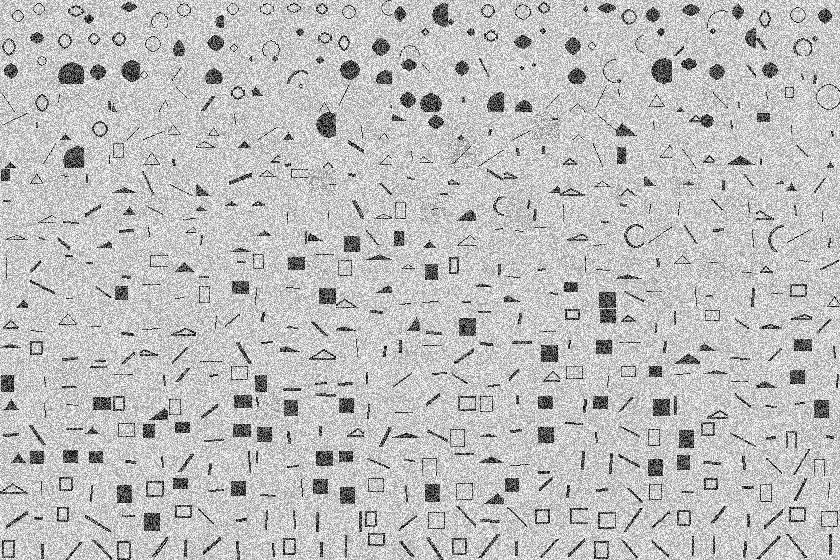

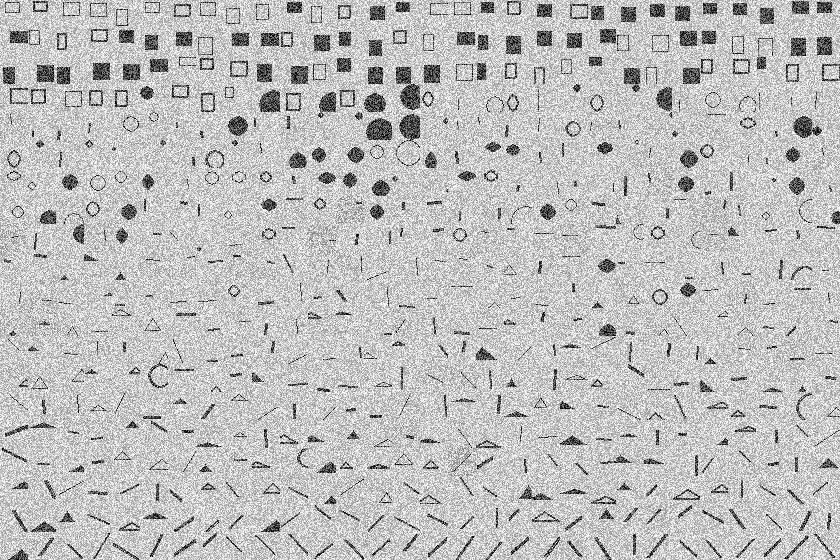

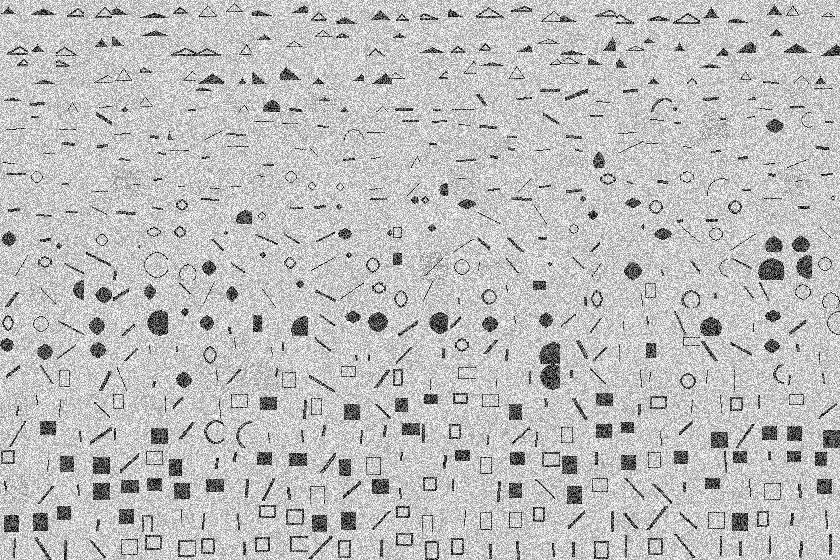

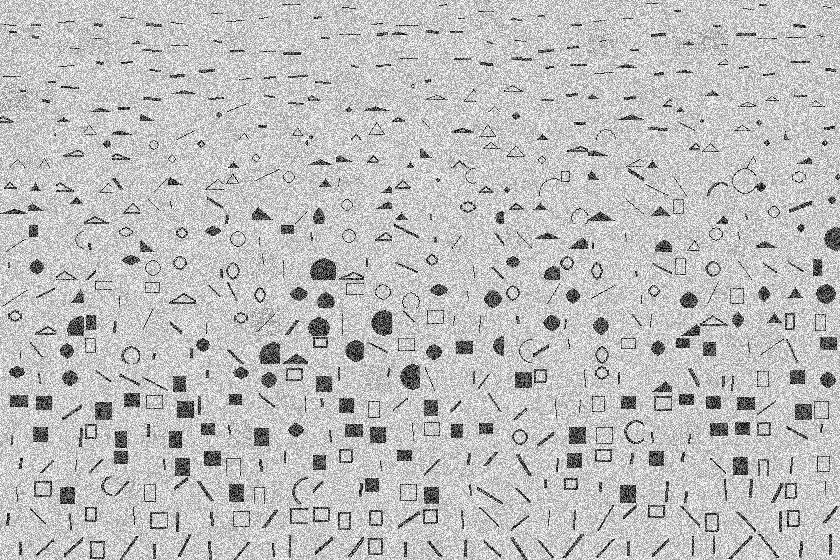

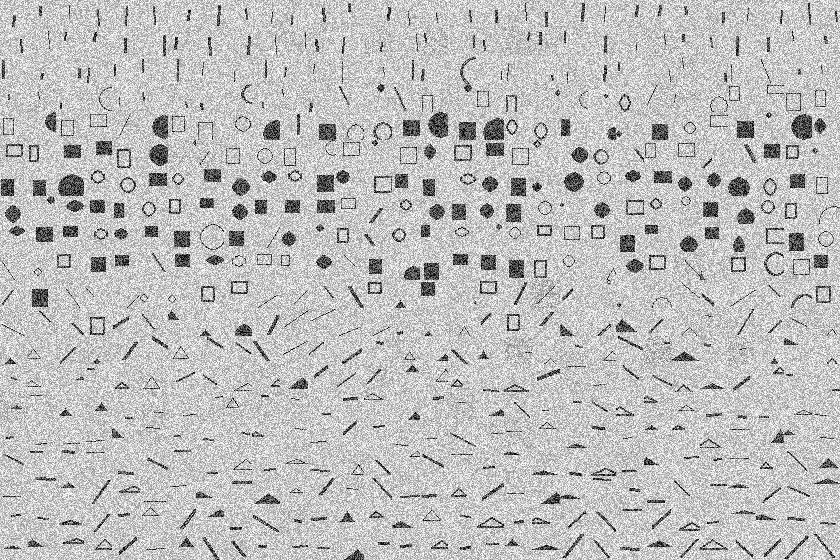

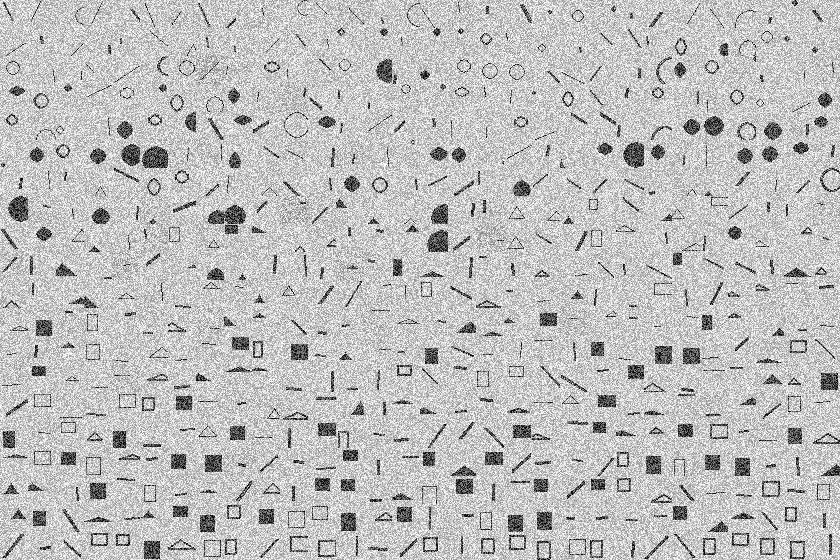

In [114]:
getCompareImages("circle", ordered_circle_dist)
getCompareImages("square", ordered_square_dist)
getCompareImages("triangle", ordered_triangle_dist)
getCompareImages("horizontal", ordered_hor_dist)
getCompareImages("vertical", ordered_ver_dist)
getCompareImages("diagonal", ordered_dia_dist)